## Project of Descriptive Analytics for Stroke  Done By Surayyi Alqahtani

In [1]:
# we will import all libraries that we need.
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.shape

(5110, 12)

In [5]:
df.describe(include= 'all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,2,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2995,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


**We have around 200 missing values in the BMI column. In this case, we will see the distribution and replace the NaN by the mean if it is a normal distribution or the median if it is skewed either right or left.** 

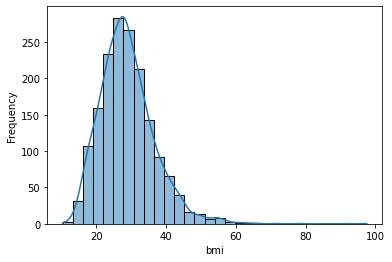

In [6]:
sns.histplot(df['bmi'], kde=True,bins=30, stat='frequency');
plt.savefig("BMI.png", dpi=100)

### We will be heading missing values in BMI by adding the Median of them. Because it is skewed right 

In [7]:
df.bmi = df.bmi.fillna(df['bmi'].median())
df.bmi.median()

28.1

In [8]:
# We replaced the (bmi NaN) values with their median = 28.1
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Now, we are done with cleaning phase

* Some visualization 

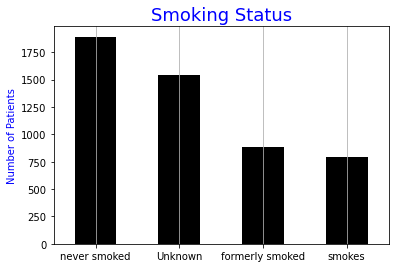

In [9]:
#mycolors = ["y", "c","r","grey"]
df['smoking_status'].value_counts().plot(kind='bar', color= "black")

plt.title("Smoking Status",color='b',fontsize = 18)
plt.grid(axis = "x")
plt.xticks(rotation=0)
plt.ylabel("Number of Patients", color='b')
plt.show()

# smoking status and their counts

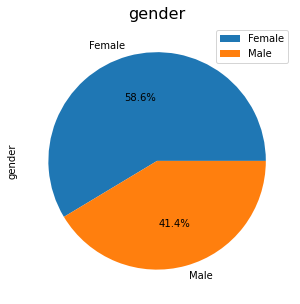

In [10]:
df = df[df.gender != 'Other'] # to get rid of the (Other) value in the gender column
df['gender'].value_counts().plot(kind='pie',y='gender', figsize=(5,5), autopct='%1.1f%%')

plt.title("gender", size= 16)
plt.legend()
plt.grid(axis = 'y')
plt.show()
# most of the dataset are females

## Now we will show the total Number of each disease that assiataed with stroke 

### First , we will show the total number of patenits whos have  hypertension with Stoke 

In [11]:
mask_hypertension_Stroke = (df.hypertension == 1) & (df.stroke == 1) 

df[mask_hypertension_Stroke].shape[0]
print(f"The Total Number of patient that have hypertension and stroke in same time is {df[mask_hypertension_Stroke].shape[0]}")

The Total Number of patient that have hypertension and stroke in same time is 66


**Befote dealing with BMI which stand for body mass index we shoud cougraial BMI to the standrd groups which is '0 to 18.5 = Underweight', '18.6 to 24.9 = Normal weight', '25 to 29.9O verweight', '30 to 34.9 Obesity', 'greatr than 35 = Extreme Obesity' , as conditantion blewe**

In [12]:
conditions = [
    (df['bmi'] >= 0) & (df['bmi'] <= 18.5),
    (df['bmi'] >= 18.6) & (df['bmi'] <= 24.9),
    (df['bmi'] >= 25) & (df['bmi'] <= 29.9),
    (df['bmi'] >= 30) & (df['bmi'] <= 34.9),
    (df['bmi'] >= 35)
    ]

values = ['Underweight', 'Normal weight', 'Overweight', 'Obesity', 'Extreme Obesity']

df['BMI_type'] = np.select(conditions, values)

In [14]:
df.sample(6)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,BMI_type
5071,52652,Male,81.0,0,0,Yes,Private,Rural,135.32,35.8,Unknown,0,Extreme Obesity
2401,29676,Male,48.0,0,0,No,Private,Urban,80.86,27.5,Unknown,0,Overweight
2205,924,Female,60.0,0,0,Yes,Govt_job,Urban,80.86,31.0,smokes,0,Obesity
1794,46035,Male,1.0,0,0,No,children,Urban,84.85,20.3,Unknown,0,Normal weight
329,54918,Female,18.0,0,0,No,Private,Rural,111.38,38.4,smokes,0,Extreme Obesity
2985,55567,Female,76.0,0,1,Yes,Private,Rural,86.09,28.1,never smoked,0,Overweight


### Now we will dealing with BMI_type whos have Obesity or Extreme Obesity and Stroke in same time 

In [15]:
mask_BMI_type_Stroke = ((df.BMI_type == "Obesity") | (df.BMI_type == "Extreme Obesity")) & (df.stroke == 1)

df[mask_BMI_type_Stroke].shape[0]
print(f"The Total Number of patient that have Obesity and stroke in same time is {df[mask_BMI_type_Stroke].shape[0]}")

The Total Number of patient that have Obesity and stroke in same time is 98


### Therd , we will dealing with  heart_disease	with Stroke 

In [16]:
mask_heart_disease_Stroke =  (df.heart_disease == 1) & (df.stroke == 1)

df[mask_heart_disease_Stroke].shape[0]
print(f"The Total Number of patient that have heart disease and stroke in same time is {df[mask_heart_disease_Stroke].shape[0]}")

The Total Number of patient that have heart disease and stroke in same time is 47


### Now we will dealing with somking status whos is smokes and have stroke.

In [17]:
mask_smoking_status_Stroke =  (df.smoking_status == "smokes") & (df.stroke == 1)

df[mask_smoking_status_Stroke].shape[0]
print(f"The Total Number of patient who is smoker and have stroke in same time is {df[mask_smoking_status_Stroke].shape[0]}")

The Total Number of patient who is smoker and have stroke in same time is 42


## We want to deal with the average glucose level to see if the patient is diabetic or not, but we have important missing information which is the time when glucose levels have been taken. Is the patient fasting?. It is after a meal? This is important information to make a decision. So we will ignore diabetic patients.

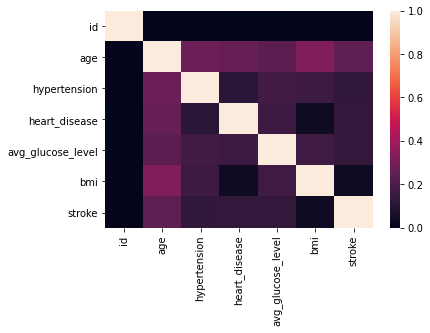

In [18]:
sns.heatmap(df.corr());
#plt.savefig("heatmap.png", dpi=150 ,figsize=(3,3))

In [19]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.005555,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.005555,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


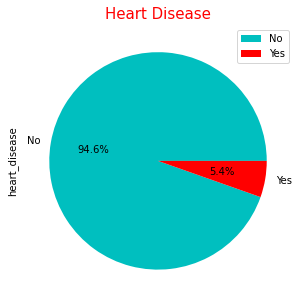

In [20]:
mycolors = ["c", "r"]
mylabels = ["No", "Yes"]
df.heart_disease.value_counts(sort=False).plot.pie(labels = mylabels, figsize=(5,5), autopct='%1.1f%%', colors = mycolors)
plt.legend()
plt.title("Heart Disease",color='r',fontsize = 15)
plt.show()

## The result:

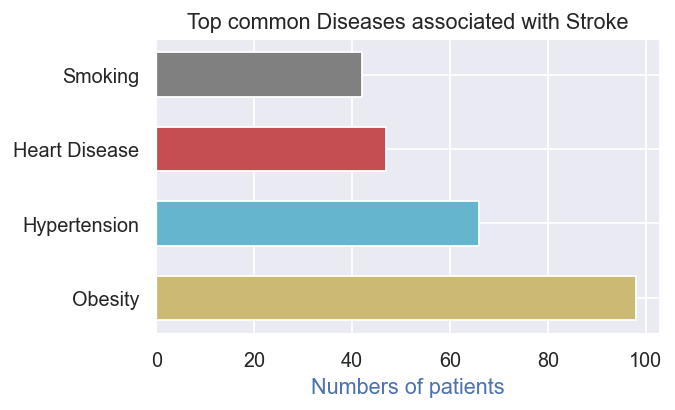

In [23]:
DiseaseName = ["Obesity" , "Hypertension" ,"Heart Disease","Smoking"]
CountFoPateints = (df[mask_BMI_type_Stroke].shape[0],df[mask_hypertension_Stroke].shape[0],df[mask_heart_disease_Stroke].shape[0],df[mask_smoking_status_Stroke].shape[0]) 
plt.figure(figsize=(5,3),dpi= 130)


mycolors = ["y", "c","r","grey"]
plt.barh(DiseaseName, CountFoPateints,0.6,color=mycolors )
#plt.legend()
plt.xlabel("Numbers of patients", color="b")
#plt.ylabel("Diseases", color="b")
plt.title("Top common Diseases associated with Stroke",size=12)
#plt.show()
plt.savefig("Test.png")

### What gender is more likely to have a stroke ?

In [24]:
mask_Male_Stroke =  (df.gender == "Male") & (df.stroke == 1)

df[mask_Male_Stroke].shape[0]

108

In [25]:
mask_Female_Stroke =  (df.gender == "Female") & (df.stroke == 1)

df[mask_Female_Stroke].shape[0]

141

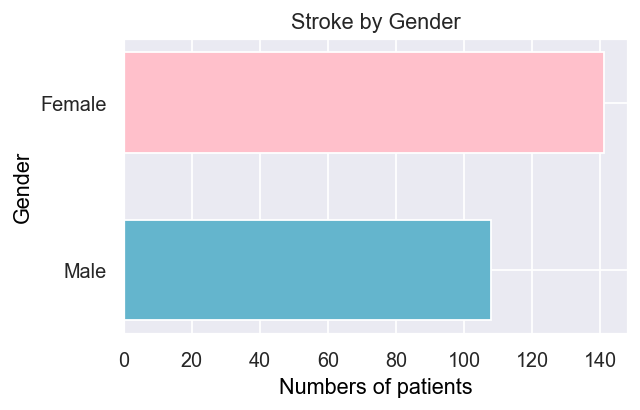

In [26]:
DiseaseName = ["Male" , "Female" ]
CountFoPateints = (df[mask_Male_Stroke].shape[0],df[mask_Female_Stroke].shape[0]) 
plt.figure(figsize=(5,3),dpi= 130)


mycolors = ["c", "pink","r","grey"]
plt.barh(DiseaseName, CountFoPateints,0.6,color=mycolors )
#plt.legend()
plt.xlabel("Numbers of patients", color="black")
plt.ylabel("Gender", color="black")
#plt.ylabel("Diseases", color="b")
plt.title("Stroke by Gender",size=12)
plt.show()
#plt.savefig("Stroke by Gender.png")

### Where are they living in a cities or villages ?

In [27]:
mask_city_Stroke =  (df.Residence_type == "Urban") & (df.stroke == 1)

df[mask_city_Stroke].shape[0]

135

In [28]:
mask_village_Stroke =  (df.Residence_type == "Rural") & (df.stroke == 1)

df[mask_village_Stroke].shape[0]

114

In [29]:
pwd

'C:\\Users\\ssq12\\OneDrive\\سطح المكتب\\SDAIA\\Projects\\week 3-4'